**The Mueller Report**

Attorney General William Barr recently released a redacted version of Robert Mueller's report on Russian interference during the 2016 US Presidential Elections.
* I want to know what is inside of it but I don't want to read it.  
* I will test if a WordCloud of page 8 explains anything.

**Step 1: Define Helper Functions**

In [1]:
# Import python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import os
from os import walk
from shutil import copytree, ignore_patterns
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from wand.image import Image as Img
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1000)

# Define helper function for plotting word clouds
def wordCloudFunction(df,column,numWords):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# Define helper function for plotting word bar graphs
def wordBarGraphFunction(df,column,title):
    # adapted from https://www.kaggle.com/benhamner/most-common-forum-topic-words
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

# Preview the data folder
inputFolder = '../input/'
for root, directories, filenames in os.walk(inputFolder):
    for filename in filenames: 
        print(os.path.join(root,filename))
        
# Reorganize the data folder
outputFolder = '/kaggle/working/pdfs/'
shutil.copytree(inputFolder,outputFolder,ignore=ignore_patterns('*.db'))
for root, directories, filenames in os.walk(outputFolder, topdown=False):
    for file in filenames:
        try:
            shutil.move(os.path.join(root, file), outputFolder)
        except OSError:
            pass
print(os.listdir(outputFolder))

../input/muellerreport.pdf
['muellerreport.pdf']


**Step 2: Convert Page 8 of PDF to CSV (Method 1 of 2)**

In [2]:
# Parse a PDF file and convert it to CSV.
# Note that there is room for improvement with how it handles certain pages compared to others
import pytesseract
pdf = os.path.join(outputFolder,'muellerreport.pdf[8]')
with Img(filename=pdf, resolution=300) as img:
    img.compression_quality = 99
    img.convert("RGBA").save(filename='/kaggle/working/mueller8.jpg')
pdfimage = Image.open('/kaggle/working/mueller8.jpg')

In [3]:
text = pytesseract.image_to_string(pdfimage)
df = pd.DataFrame([text.split('\n')])
test_csv = df.to_csv('/kaggle/working/pytesseract_csv.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,U.S. Department of Justice,,WWW/WW,,INTRODUCTION TO VOLUME I,,"This report is submitted to the Attorney General pursuant to 28 C.F.R. § 600.8(0), which","states that, “[a]t the conclusion of the Special Counsel’s work, he . . . shall provide the Attorney",General a conﬁdential report explaining the prosecution or declination decisions [the Special,Counsel] reached.”,,The Russian government interfered in the 2016 presidential election in sweeping and,systematic fashion. Evidence of Russian government operations began to surface in mid-2016. In,"June, the Democratic National Committee and its cyber response team publicly announced that",Russian hackers had compromised its computer network. Releases of hacked materials—hacks,that public reporting soon attributed to the Russian government—began that same month.,"Additional releases followed in July through the organization WikiLeaks, with further releases in",October and November.,,"In late July 2016, soon after WikiLeaks’s first release of stolen documents, a foreign",government contacted the FBI about a May 2016 encounter with Trump Campaign foreign policy,advisor George Papadopoulos. Papadopoulos had suggested to a representative of that foreign,government that the Trump Campaign had received indications from the Russian government that,it could assist the Campaign through the anonymous release of information damaging to,Democratic presidential candidate Hillary Clinton. That information prompted the FBI on July,"31, 2016, to open an investigation into whether individuals associated with the Trump Campaign",were coordinating with the Russian government in its interference activities.,,"That fall, two federal agencies jointly announced that the Russian government “directed","recent compromises of e-mails from US persons and institutions, including US political","organizations,” and, “[t]hese thefts and disclosures are intended to interfere with the US election","process.” After the election, in late December 2016, the United States imposed sanctions on Russia","for having interfered in the election. By early 2017, several congressional committees were",examining Russia’s interference in the election.,,"Within the Executive Branch, these investigatory efforts ultimately led to the May 2017","appointment of Special Counsel Robert S. Mueller, III. The order appointing the Special Counsel",authorized him to investigate “the Russian government’s efforts to interfere in the 2016,"presidential election,” including any links or coordination between the Russian government and",individuals associated with the Trump Campaign.,,"As set forth in detail in this report, the Special Counsel’s investigation established that","Russia interfered in the 2016 presidential election principally through two operations. First, a",Russian entity carried out a social media campaign that favored presidential candidate Donald J.,"Trump and disparaged presidential candidate Hillary Clinton. Second, a Russian intelligence","service conducted computer-intrusion operations against entities, employees, and volunteers",working on the Clinton Campaign and then released stolen documents. The investigation also,identified numerous links between the Russian government and the Trump Campaign. Although,the investigation established that the Russian government perceived it would beneﬁt from a Trump,"presidency and worked to secure that outcome, and that the Campaign expected it would beneﬁt '"


**Step 3: Convert Page 8 of PDF to CSV (Method 2 of 2)**

In [4]:
# Parse a PDF file and convert it to CSV
# Note that there is room for improvement with how it handles certain pages compared to others
!pip install tika
import tika
from tika import parser
tika.initVM()
parsed = parser.from_file('/kaggle/working/mueller8.jpg')

  Stored in directory: /tmp/.cache/pip/wheels/b4/db/8a/3a3f0c0725448eaa92703e3dda71e29dc13a119ff6c1036848
Successfully built tika


2019-04-19 00:30:35,358 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.19/tika-server-1.19.jar to /tmp/tika-server.jar.
2019-04-19 00:30:37,488 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.19/tika-server-1.19.jar.md5 to /tmp/tika-server.jar.md5.
2019-04-19 00:30:37,879 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [5]:
text = parsed["content"]
df = pd.DataFrame([text.split('\n')])
df.drop(df.iloc[:, 1:46], inplace=True, axis=1)
test_csv = df.to_csv('/kaggle/working/tika_csv.csv')
df.head()

,0,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,,,U.S. Department of Justice,,Wf/WWWWWW,,INTRODUCTION TO VOLUME 1,,"This report is submitted to the Attorney General pursuant to 28 C.F.R. § 600.8(c), which","states that, “[a]t the conclusion of the Special Counsel’s work, he . . . shall pr0vide the Attorney",General a conﬁdential report explaining the prosecution or declination decisions [the Special,Counsel] reached.”,,The Russian government interfered in the 2016 presidential election in sweeping and,Systematic fashion. Evidence of Russian government operations began to surface in mid-2016. In,"June, the Democratic National Committee and its cyber response team publicly announced that",Russian hackers had compromised its computer network. Releases of hacked materials—hacks,that public reporting soon attributed to the Russian government—began that same month.,"Additional releases followed in July through the organization WikiLeaks, with further releases in",October and November.,,"In late July 2016, soon after WikiLeaks’s first release of stolen documents, a foreign",government contacted the FBI about a May 2016 encounter with Trump Campaign foreign policy,advisor George Papadopoulos. Papadopoulos had suggested to a representative of that foreign,government that the Trump Campaign had received indications from the Russian government that,it could assist the Campaign through the anonymous release of information damaging to,Democratic presidential candidate Hillary Clinton. That information prompted the FBI on July,"31, 2016, to open an investigation into whether individuals associated with the Trump Campaign",were coordinating with the Russian government in its interference activities.,,"That fall, two federal agencies jointly announced that the Russian government “directed","recent compromises of e-mails from US persons and institutions, including US political","organizations,” and, “[t]hese thefts and disclosures are intended to interfere with the US election","process.” After the election, in late December 2016, the United States imposed sanctions on Russia","for having interfered in the election. By early 2017, several congressional committees were",examining Russia’s interference in the election.,,"Within the Executive Branch, these investigatory efforts ultimately led to the May 2017","appointment of Special Counsel Robert S. Mueller, III. The order appointing the Special Counsel",authorized him to investigate “the Russian government’s efforts to interfere in the 2016,"presidential election,” including any links or coordination between the Russian government and",individuals associated with the Trump Campaign.,,"As set forth in detail in this report, the Special Counsel’s investigation established that","Russia interfered in the 2016 presidential election principally through two operations. First, a",Russian entity carried out a social media campaign that favored presidential candidate Donald J.,"Trump and disparaged presidential candidate Hillary Clinton. Second, a Russian intelligence","service conducted computer-intrusion operations against entities, employees, and volunteers",working on the Clinton Campaign and then released stolen documents. The investigation also,identiﬁed numerous links between the Russian government and the Trump Campaign. Although,the investigation established that the Russian government perceived it would beneﬁt from a Trump,"presidency and worked to secure that outcome, and that the Campaign expected it would beneﬁt '",,,


**Step 4: Analyze Contents of CSV File**

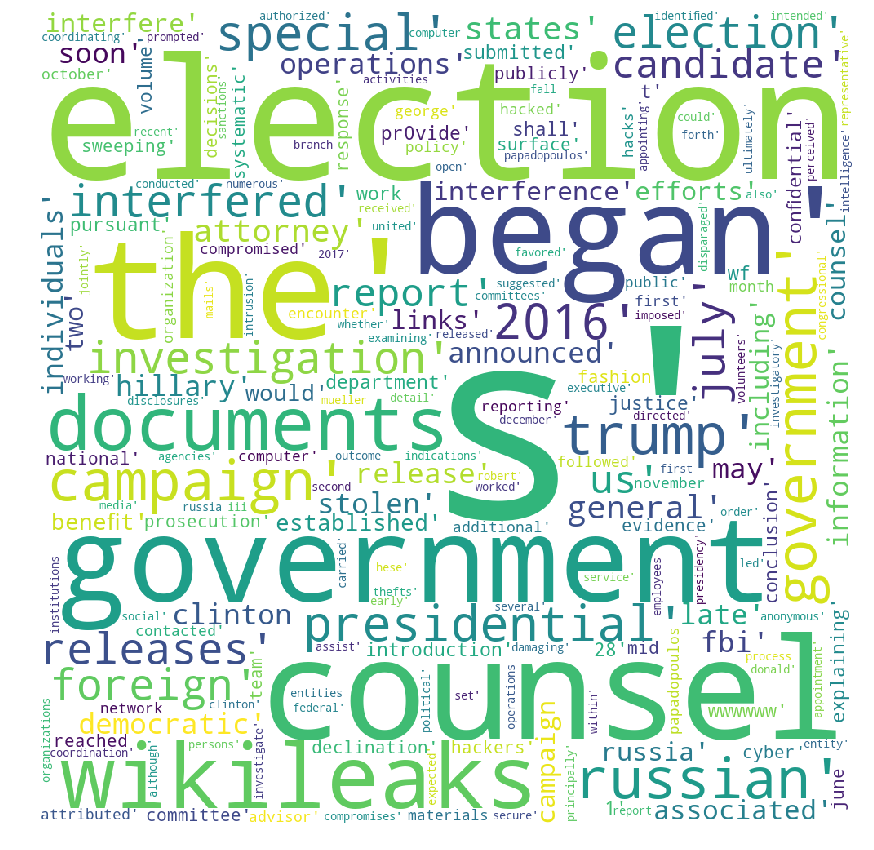

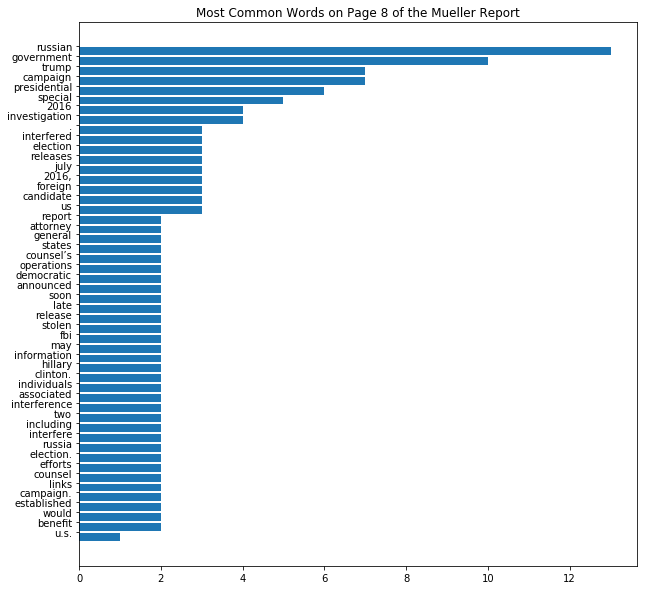

In [6]:
# Plot WordCloud of page 8
plt.figure(figsize=(15,15))
wordCloudFunction(df.T,0,10000000)
plt.figure(figsize=(10,10))
wordBarGraphFunction(df.T,0,"Most Common Words on Page 8 of the Mueller Report")

In [7]:
# Clean up the notebook
!apt-get install zip
!zip -r pdfs.zip /kaggle/working/pdfs/
!rm -rf pdfs/* 




The following NEW packages will be installed:
  zip
0 upgraded, 1 newly installed, 0 to remove and 43 not upgraded.
Need to get 234 kB of archives.
After this operation, 623 kB of additional disk space will be used.
Get:1 http://deb.debian.org/debian stretch/main amd64 zip amd64 3.0-11+b1 [234 kB]
Fetched 234 kB in 0s (1926 kB/s)
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package zip.
(Reading database ... 35518 files and directories currently installed.)
Preparing to unpack .../zip_3.0-11+b1_amd64.deb ...
Unpacking zip (3.0-11+b1) ...
Setting up zip (3.0-11+b1) ...
  adding: kaggle/working/pdfs/ (stored 0%)
  adding: kaggle/working/pdfs/muellerreport.pdf (deflated 11%)


In conclusion, a WordCloud of page 8 does not effectively explain the contents of the Mueller Report.